In [1]:
%matplotlib inline

# Benchmark over-sampling methods 

In [20]:
# Authors: Christos Aridas
#          Guillaume Lemaitre <g.lemaitre58@gmail.com>
# License: MIT

import matplotlib.pyplot as plt
import numpy as np
from scipy import interp
from sklearn import datasets, neighbors
from sklearn.metrics import auc, roc_curve
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import ADASYN, SMOTE, RandomOverSampler
from imblearn.pipeline import make_pipeline

print(__doc__)

LW = 2
RANDOM_STATE = 42


class DummySampler(object):

    def sample(self, X, y):
        return X, y

    def fit(self, X, y):
        return self

    def fit_sample(self, X, y):
        return self.sample(X, y)


cv = StratifiedKFold(n_splits=3)

Automatically created module for IPython interactive environment


In [16]:
import pickle
X = pickle.load(open('/Users/ruiwang/source/dont_get_kicked/my_df_training_onehot.pickle', 'rb'))
y = pickle.load(open('/Users/ruiwang/source/dont_get_kicked/my_y.pickle', 'rb'))
X = np.array(X)
y = np.array(y)

In [17]:
X

array([[-0.14253384,  0.37946651, -0.68721228, ...,  0.        ,
         0.        ,  0.        ],
       [-0.14253384, -0.77577499,  0.48087654, ...,  0.        ,
         0.        ,  0.        ],
       [-0.14253384, -0.19815424, -0.10316787, ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [-0.19749729, -0.19815424, -0.10316787, ...,  0.        ,
         0.        ,  0.        ],
       [-0.19749729,  0.37946651, -0.68721228, ...,  0.        ,
         0.        ,  0.        ],
       [-0.19749729,  0.37946651, -0.68721228, ...,  0.        ,
         0.        ,  0.        ]])

In [18]:
y

array([0, 0, 0, ..., 0, 0, 0])

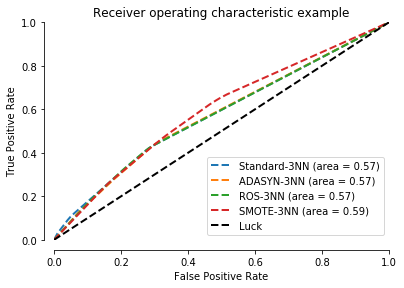

In [19]:
classifier = ['3NN', neighbors.KNeighborsClassifier(3)]

samplers = [
    ['Standard', DummySampler()],
    ['ADASYN', ADASYN(random_state=RANDOM_STATE)],
    ['ROS', RandomOverSampler(random_state=RANDOM_STATE)],
    ['SMOTE', SMOTE(random_state=RANDOM_STATE)],
]

pipelines = [
    ['{}-{}'.format(sampler[0], classifier[0]),
     make_pipeline(sampler[1], classifier[1])]
    for sampler in samplers
]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for name, pipeline in pipelines:
    mean_tpr = 0.0
    mean_fpr = np.linspace(0, 1, 100)
    for train, test in cv.split(X, y):
        probas_ = pipeline.fit(X[train], y[train]).predict_proba(X[test])
        fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
        mean_tpr += interp(mean_fpr, fpr, tpr)
        mean_tpr[0] = 0.0
        roc_auc = auc(fpr, tpr)

    mean_tpr /= cv.get_n_splits(X, y)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, mean_tpr, linestyle='--',
             label='{} (area = %0.2f)'.format(name) % mean_auc, lw=LW)

plt.plot([0, 1], [0, 1], linestyle='--', lw=LW, color='k',
         label='Luck')

# make nice plotting
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')

plt.legend(loc="lower right")

plt.show()